In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
N = 500
L = 100
h = L / N
T = 100
lam = 1
rho = 1000
tau = h / lam / 50
M = round(T / tau)
U = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])

In [3]:
def convert(mat, U, f, e):
    W = np.zeros(N, dtype=[(e[0], np.float64), (e[1], np.float64)])
    for i in range(N):
        W[i][e[0]] = U[i][f[0]] * mat[0][0] + U[i][f[1]] * mat[0][1]
        W[i][e[1]] = U[i][f[0]] * mat[1][0] + U[i][f[1]] * mat[1][1]
    return W

In [4]:
def p_init(p):
    for i in range(N):
        if (i * h > 5 * L / 12) and (i * h < 7 * L / 12):
            p[i] = 10
        else:
            p[i] = 0

In [5]:
def v_init(v):
    for i in range(N):
        if (i * h > 5 * L / 12) and (i * h < 7 * L / 12) and (0 == 0):
            v[i] = 0.01 * rho * lam
        else:
            v[i] = 0

In [6]:
p_init(U['p'])
v_init(U['v'])

In [7]:
mat = np.array([[1, -1], [rho * lam, rho * lam]])
W = convert(mat, U, f=('v', 'p'), e=('1', '2'))

In [8]:
def D1_solver(h, N, M, lam, tau, Q_0):
    Q = Q_0.copy()
    Q_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
    for j in range(M):
        for i in range (1, N):
            x_star = -lam * tau
            b = Q['2'][i]
            a = (Q['2'][i - 1] - b) / (-h)
            Q_new['2'][i] = a * x_star + b
        for i in range (0, N - 1):
            x_star = lam * tau
            b = Q['1'][i]
            a = (Q['1'][i + 1] - b) / h
            Q_new['1'][i] = a * x_star + b
        Q_new['2'][0] = -Q_new['1'][0]
        Q_new['1'][N - 1] = -Q_new['2'][N - 1] / rho / lam
        Q = Q_new
    return Q_new

In [9]:
W_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
W_new = D1_solver(h, N, M, lam, tau, W)
x = np.linspace(0, L, N)
mat_obr = np.array([[1 / 2, 1 / (2 * rho * lam)], [-1 / 2, 1 / (2 * rho * lam)]])
U_new = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])
U_new = convert(mat_obr, W_new, f=('1', '2'), e=('v', 'p'))

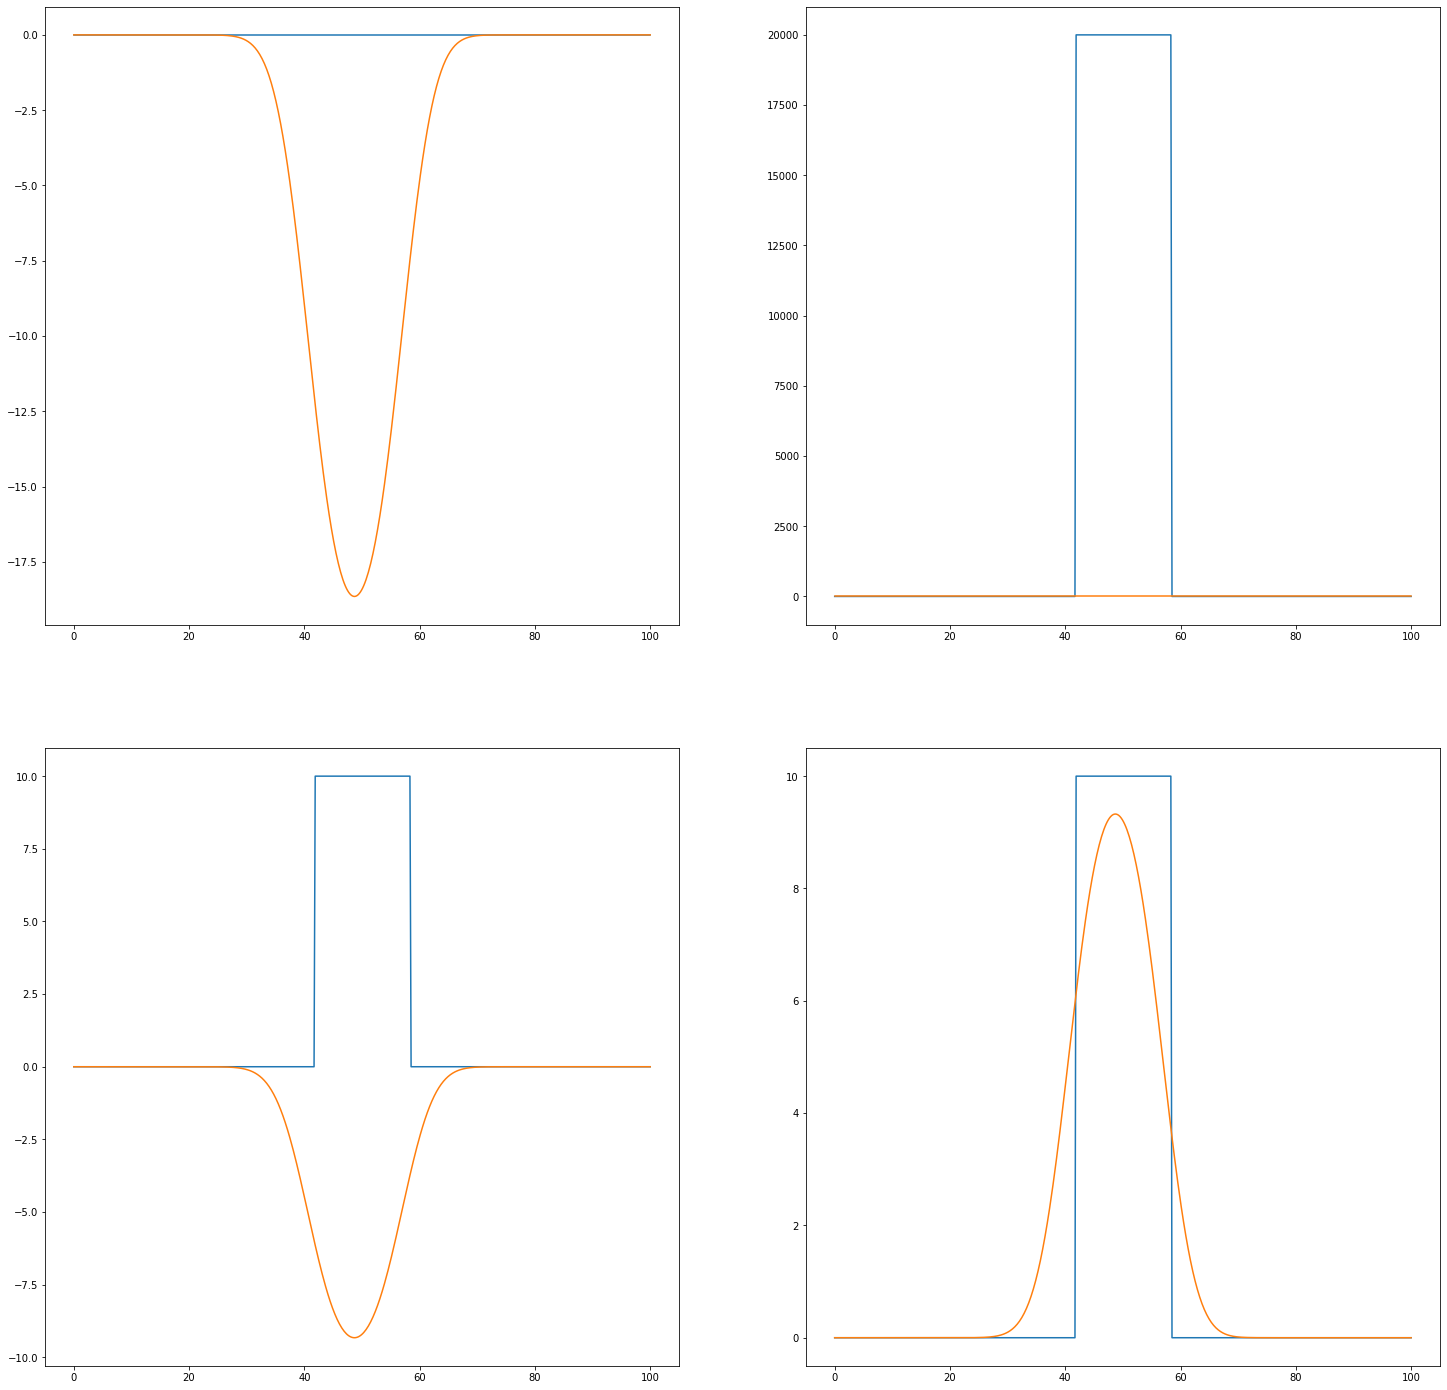

In [10]:
plt.figure(figsize=(25,25))
plt.subplot(2, 2, 1)
plt.plot(x, W['1'])
plt.plot(x, W_new['1'])
plt.subplot(2, 2, 2)
plt.plot(x, W['2'])
plt.plot(x, W_new['2'])
plt.subplot(2, 2, 3)
plt.plot(x, U['v'])
plt.plot(x, U_new['v'])
plt.subplot(2, 2, 4)
plt.plot(x, U['p'])
plt.plot(x, U_new['p'])

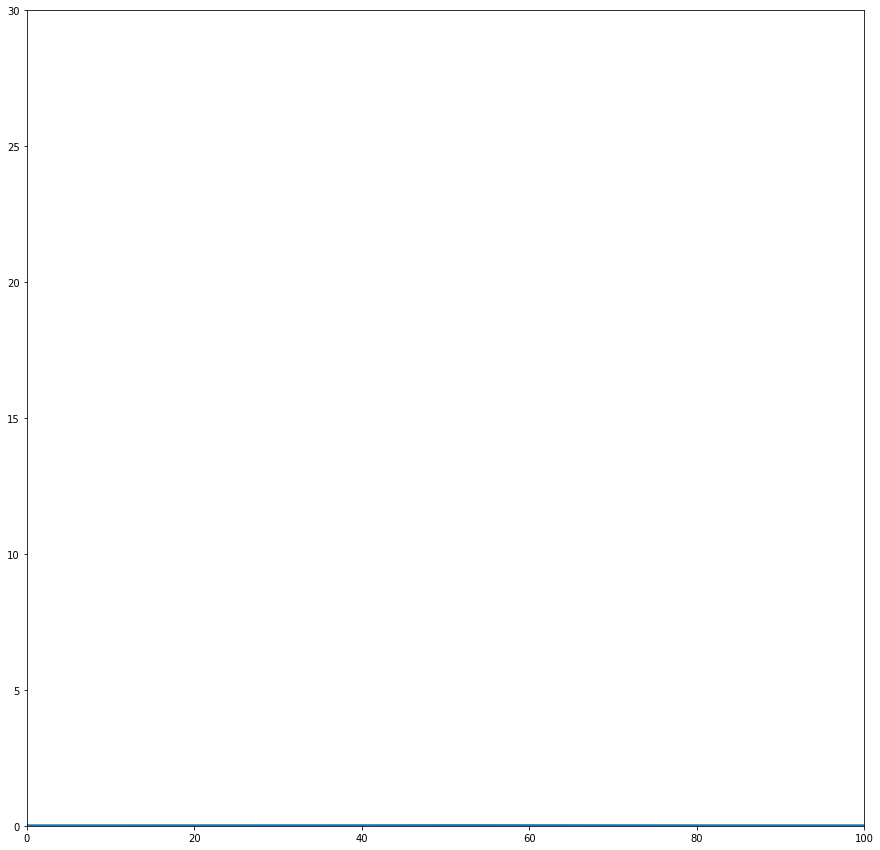

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(xlim=(0, L), ylim=(0, 30))
line, = ax.plot([], [], lw=3)
 
def init():
    line.set_data([], [])
    return line,
def animate(i):
    M = round((4 * i) / tau)
    W_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
    W_new = D1_solver(h, N, M, lam, tau, W)
    x = np.linspace(0, L, N)
    mat_obr = np.array([[1 / 2, 1 / (2 * rho * lam)], [-1 / 2, 1 / (2 * rho * lam)]])
    U_new = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])
    U_new = convert(mat_obr, W_new, f=('1', '2'), e=('v', 'p'))
    line.set_data(x, U_new['p'])
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init, frames=50, interval=200, blit=True)
anim.save('sine_wave.gif', writer='pillow')